In [1]:
import collections
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
G = nx.Graph()
G.clear()
G.add_nodes_from(range(7819)) #total number of nodes in the graph


In [2]:
graphdata = open("trimmed.txt","r")

In [3]:
while True:
    line = graphdata.readline()
    if line == "":
        break
    
    line = line.replace("[","")
    line = line.replace("]\n","")
    line = line.replace(",","")
    line = line.split()
    #print(line[0],line[1])
    G.add_edge(int(line[0]),int(line[1]))
    

In [4]:
G.number_of_edges() #total number of edges in the graph

328355

In [5]:
G.number_of_nodes()

7821

In [6]:
nx.number_connected_components(G)

1

In [7]:
reachable = nx.algorithms.dag.descendants(G,5)
len(reachable)

7820

In [8]:
#Now to recognize the top 100 highest degree nodes.
sorteddegree = sorted(G.degree, key=lambda x: x[1], reverse = True)
sorteddegree = sorteddegree[0:200]

In [9]:
tempReach = G.copy()
sorteddegree

[(2243, 2734),
 (2623, 2470),
 (6223, 2398),
 (2241, 2341),
 (2954, 2325),
 (2240, 2315),
 (2643, 2292),
 (3124, 2281),
 (6221, 2280),
 (2557, 2277),
 (4470, 2267),
 (6222, 2257),
 (82, 2243),
 (169, 2145),
 (3293, 2104),
 (2971, 2093),
 (3076, 2080),
 (150, 2026),
 (2244, 1957),
 (2412, 1947),
 (2245, 1854),
 (151, 1708),
 (2246, 1708),
 (5392, 1646),
 (2247, 1378),
 (152, 1321),
 (3566, 1193),
 (2697, 1052),
 (5328, 993),
 (6224, 975),
 (2242, 972),
 (2972, 937),
 (4291, 837),
 (2961, 713),
 (83, 674),
 (6225, 668),
 (4702, 550),
 (3214, 541),
 (1883, 508),
 (1755, 507),
 (84, 505),
 (5421, 476),
 (2425, 454),
 (2493, 454),
 (2249, 453),
 (87, 447),
 (3650, 446),
 (65, 418),
 (86, 407),
 (2248, 401),
 (6375, 392),
 (85, 382),
 (2139, 372),
 (115, 346),
 (2644, 339),
 (6291, 335),
 (265, 334),
 (110, 328),
 (2772, 324),
 (3721, 318),
 (6002, 310),
 (2519, 293),
 (2435, 292),
 (2593, 285),
 (1395, 284),
 (62, 283),
 (2277, 281),
 (2250, 280),
 (2671, 280),
 (165, 279),
 (444, 278),
 (4

In [11]:
reachDec = np.empty([1,200])

In [12]:
for i in range(200):
    reachDec[0][i] = len(nx.algorithms.dag.descendants(tempReach,sorteddegree[i][0]))
    tempReach.remove_node(sorteddegree[i][0])
    

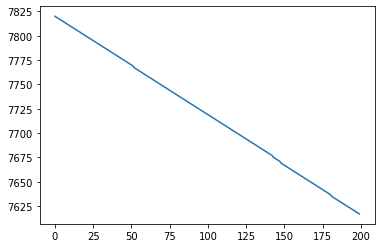

In [13]:
plt.plot(reachDec[0])

# Highest Degree/Betweenness/Eigenvector Centrality Attacked

## Highest Degrees (top 200)

In [14]:
#Now to recognize the top 100 highest degree nodes.
sorteddegree = sorted(G.degree, key=lambda x: x[1], reverse = True)
sorteddegree = sorteddegree[0:200]

In [15]:
Atemp = G.copy()
sorteddegree

[(2243, 2734),
 (2623, 2470),
 (6223, 2398),
 (2241, 2341),
 (2954, 2325),
 (2240, 2315),
 (2643, 2292),
 (3124, 2281),
 (6221, 2280),
 (2557, 2277),
 (4470, 2267),
 (6222, 2257),
 (82, 2243),
 (169, 2145),
 (3293, 2104),
 (2971, 2093),
 (3076, 2080),
 (150, 2026),
 (2244, 1957),
 (2412, 1947),
 (2245, 1854),
 (151, 1708),
 (2246, 1708),
 (5392, 1646),
 (2247, 1378),
 (152, 1321),
 (3566, 1193),
 (2697, 1052),
 (5328, 993),
 (6224, 975),
 (2242, 972),
 (2972, 937),
 (4291, 837),
 (2961, 713),
 (83, 674),
 (6225, 668),
 (4702, 550),
 (3214, 541),
 (1883, 508),
 (1755, 507),
 (84, 505),
 (5421, 476),
 (2425, 454),
 (2493, 454),
 (2249, 453),
 (87, 447),
 (3650, 446),
 (65, 418),
 (86, 407),
 (2248, 401),
 (6375, 392),
 (85, 382),
 (2139, 372),
 (115, 346),
 (2644, 339),
 (6291, 335),
 (265, 334),
 (110, 328),
 (2772, 324),
 (3721, 318),
 (6002, 310),
 (2519, 293),
 (2435, 292),
 (2593, 285),
 (1395, 284),
 (62, 283),
 (2277, 281),
 (2250, 280),
 (2671, 280),
 (165, 279),
 (444, 278),
 (4

In [16]:
degreeDec = np.empty([1,200])

In [17]:
#Removing Nodes one by one according to decreasing degree
#Storing new values of remaining edges
for i in range(200):
    Atemp.remove_node(sorteddegree[i][0])
    degreeDec[0][i] = Atemp.number_of_edges()

In [18]:
Atemp.number_of_edges()

226722

In [19]:
Atemp.number_of_nodes()

7621

In [20]:
G.number_of_edges()

328355

In [21]:
G.number_of_nodes()

7821

Text(0.5, 0, 'Number of Nodes Removed')

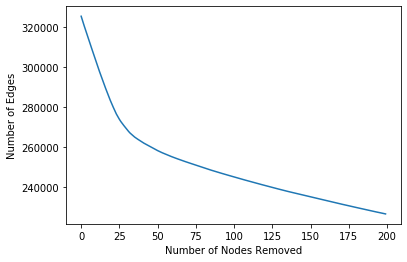

In [22]:
plt.plot(degreeDec[0])
plt.ylabel('Number of Edges')
plt.xlabel('Number of Nodes Removed')

## Highest Betweenness (top 200)

In [23]:
#Now to recognize the top 100 highest betweenness nodes.
sbetween = nx.betweenness_centrality(G,k=7821)

In [24]:
sbetween

{0: 1.2158065068510189e-05,
 1: 9.67148732380327e-05,
 2: 5.3889962488625426e-05,
 3: 3.336752179659869e-06,
 4: 5.523488301554891e-05,
 5: 0.00011422225377937821,
 6: 0.00011027169627292955,
 7: 6.22176652275847e-07,
 8: 7.72525021622001e-05,
 9: 9.40533787620714e-05,
 10: 0.00014621009376876667,
 11: 1.0126105879400781e-05,
 12: 7.775761351809023e-05,
 13: 0.00010258655822755192,
 14: 0.0,
 15: 6.0540928598002196e-05,
 16: 7.472246407462052e-05,
 17: 3.7291131828405372e-06,
 18: 0.000118643547273697,
 19: 0.0004033309099853135,
 20: 4.788702494413384e-06,
 21: 5.495648876510158e-05,
 22: 7.848319322845884e-05,
 23: 6.322866376661143e-05,
 24: 7.101732343368104e-05,
 25: 6.533387346851067e-05,
 26: 8.955696711476496e-05,
 27: 1.0371077685449585e-05,
 28: 0.00010443166350264668,
 29: 4.6563899583666494e-06,
 30: 0.00010375868080659642,
 31: 7.251392347800011e-05,
 32: 1.2305509864636656e-05,
 33: 8.95662940887151e-05,
 34: 6.632446887122801e-05,
 35: 3.6144906745166847e-06,
 36: 5.1814

In [25]:
sbetweensorted = {k: v for k, v in reversed(sorted(sbetween.items(), key=lambda item: item[1]))}
sbetweensorted

{2243: 0.045909552065670996,
 2623: 0.023575552266994943,
 6223: 0.022190809951467876,
 3076: 0.020263017102860187,
 2954: 0.01706488196709256,
 2241: 0.01694578310170049,
 3293: 0.016192546842568385,
 82: 0.016006916463720298,
 2643: 0.015593609537316134,
 2240: 0.015582992060594535,
 6221: 0.015577289377033447,
 3124: 0.01489766919714226,
 2557: 0.014747645840188598,
 6222: 0.014346171757243462,
 150: 0.0140253821750256,
 169: 0.013774883947394335,
 2412: 0.012902645053435087,
 4470: 0.012579010467238312,
 2971: 0.012011706873835232,
 2244: 0.01058149474388301,
 151: 0.00993563158537396,
 2245: 0.009870476587874103,
 2246: 0.00981006161919709,
 152: 0.00869882087671741,
 5392: 0.006823933917610016,
 2247: 0.006601242075233458,
 3566: 0.005255760186178308,
 2961: 0.005038942854313775,
 3214: 0.004789007820726397,
 6224: 0.0045717672263465795,
 2697: 0.003512950348967985,
 5328: 0.0032020017361982676,
 4291: 0.0031441069198447184,
 83: 0.003044806281310925,
 87: 0.003032938043615749,
 

In [ ]:
x = list(sbetweensorted.keys())
x

In [ ]:
degdec = np.empty([1,200])
Btemp = G.copy()
Btemp.number_of_edges()
x=x[0:200]
len(x)

In [ ]:
p = 0
for i in x:
    Btemp.remove_node(i)
    degdec[0][p] = Btemp.number_of_edges()
    p = p + 1
p = 0


In [ ]:
plt.plot(degdec[0])
plt.ylabel("No of Edges")
plt.xlabel("No of Nodes Removed")

## Highest Eigenvector Centrality (top 200)

In [ ]:
#Now to identify the top 100 highest eigenvector centrality nodes
ecentral = nx.eigenvector_centrality(G)

In [ ]:
ecentral

In [ ]:
ecentralsorted = {k: v for k, v in reversed(sorted(ecentral.items(), key=lambda item: item[1]))}
ecentralsorted

In [ ]:
x = list(ecentralsorted.keys())
x

In [ ]:
edec = np.empty([1,200])
Ctemp = G.copy()
Ctemp.number_of_edges()
x=x[0:200]
len(x)

In [ ]:
p = 0
for i in x:
    Ctemp.remove_node(i)
    edec[0][p] = Ctemp.number_of_edges()
    p = p + 1
p = 0
edec[0]

In [ ]:
plt.plot(edec[0])
plt.ylabel("No of Edges")
plt.xlabel("No of Nodes Removed")

## Calculating the Minimum Cutsets

In [ ]:
#Calculating the Minimum Cut for the Ethereum Network
#mincut = nx.minimum_cut(G,s,t,)
#Sampling for 200 nodes
k = 200
sampled_nodes = random.sample(G.nodes,k)
sampled_edges = random.sample(G.nodes,k)

Sgraph = nx.Grap

# Implementing random attacks on nodes

In [ ]:
#Random nodes disabling - for 100 rounds